<a id='tbl_content'></a>
<div style="border : 3px solid non; font-family:Times New Roman; font-size:110%;padding:10px">

    
    
* **[1. Description](#1)**
      
* **[2. Setup ](#2)**  
  
* **[3. Data ](#3)**     
   - [Load Data](#31)
   - [Count Plot](#32)
   - [Image Show](#33) 
  
* **[4. Data Preprocessing ](#4)**
   - [Create a DataSet](#41)   
   - [Split to [train, test, validation]](#42)      
   
* **[5. Create a Model ](#5)**    
   - [Pretrained model](#51)
   - [Freeze Pretrained Model Layers](#52)
   - [Add Some Dense Layers](#53) 
   - [CallBacks](#54)
   - [Compile The Model](#55)
   - [Train The Model](#56)
   - [Evaluation](#57)  
    
 * **[6. Author ](#author)**

<a id="2"></a>
# <p style="padding:10px; margin:0;color:#440381 ;font-size:120% ;text-align:center; border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c; overflow:hidden;font-weight:900; background-color:#0a0254; color:white">Description</p>

<div style="border:4px solid navy; border-radius:30px; padding: 15px; background-size: cover">
    <p><h5 style="font-size:100%; font-family:Arial ">This dataset, contain 22566 animal images of 80 classes.</h5></p>
</div>

<div style="border:4px solid navy; border-radius:30px; padding: 15px; background-size: cover">
    <p><h5 style="font-size:100%; font-family:Arial ">At First, input data and show some plots and images, then create dataset from images with 80 classes . after that, create a model contain a pretrained model and some dense layers added to it, then start train the model with our animal data.</h5></p>
</div>

<a id="2"></a>
# <p style="padding:10px; margin:0;color:#440381 ;font-size:120% ;text-align:center; border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c; overflow:hidden;font-weight:900; background-color:#0a0254; color:white">Setup</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 First, install neccessary libraries with <code>pip install lib-name</code> command.
    </p>
</div>

In [1]:
! pip install -q silence_tensorflow

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 Import and call the functions with <code>import</code> command. 
    </p>
</div>

In [2]:
# A libraries to avoid keras and tensorflow warnings
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# A libraries to avoid other warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import os                                # To work with operation system comands
import pandas as pd                      # To work with DataFrames
import numpy as np                       # To work with arrays
import random                            # To generate random number and choices
import matplotlib.pyplot as plt          # To create plots and visualizations
import seaborn as sns                    # To create plots and visualizations
from termcolor import colored            # To create colorfull output
from PIL import Image                    # To read images from source

import tensorflow as tf                  # Main Franework
import keras                             # To create and manage deep neural networks

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 Call a function to better plot visualizations.
    </p>
</div>

In [4]:
sns.set_style('darkgrid')

<a id="3"></a>
# <p style="padding:10px; margin:0;color:#440381 ;font-size:120% ;text-align:center; border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c; overflow:hidden;font-weight:900; background-color:#0a0254; color:white">Data</p>

<a id="31"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 3.1 </span><span style="color:white"> | Load Data</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 In this step, read main data form kaggle, define folders pathes and classes.
    </p>
</div>

In [5]:
# Location of main dataset
base_dir  = '/kaggle/input/animals-detection-images-dataset/'

# Show main directory containers
os.listdir(base_dir)

['test', 'train']

In [6]:
# Define train and test folders pathes.
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 Count number of folders in train directory as number of classes.
    </p>
</div>

In [7]:
# Number of classes
classes = os.listdir(train_dir)
num_classes = len(classes)

<a id="32"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 3.2 </span><span style="color:white"> | Count Plot</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 To show <b>Count plot</b>, do below steps :
    </p>
    <ul>
    <li style='font-size:90%'>1️⃣ Create a variable and loop over classes and count images, store them in variable with a tupple in from of <b>(count, class-name)</b></li></br>
    <li style='font-size:90%'>2️⃣ Convert it to <b>pandas DataFrame</b></li></br>
    <li style='font-size:90%'>3️⃣ Plot the dataframe with <b>Seaborn</b> library.</li></br>
    </ul>
</div>

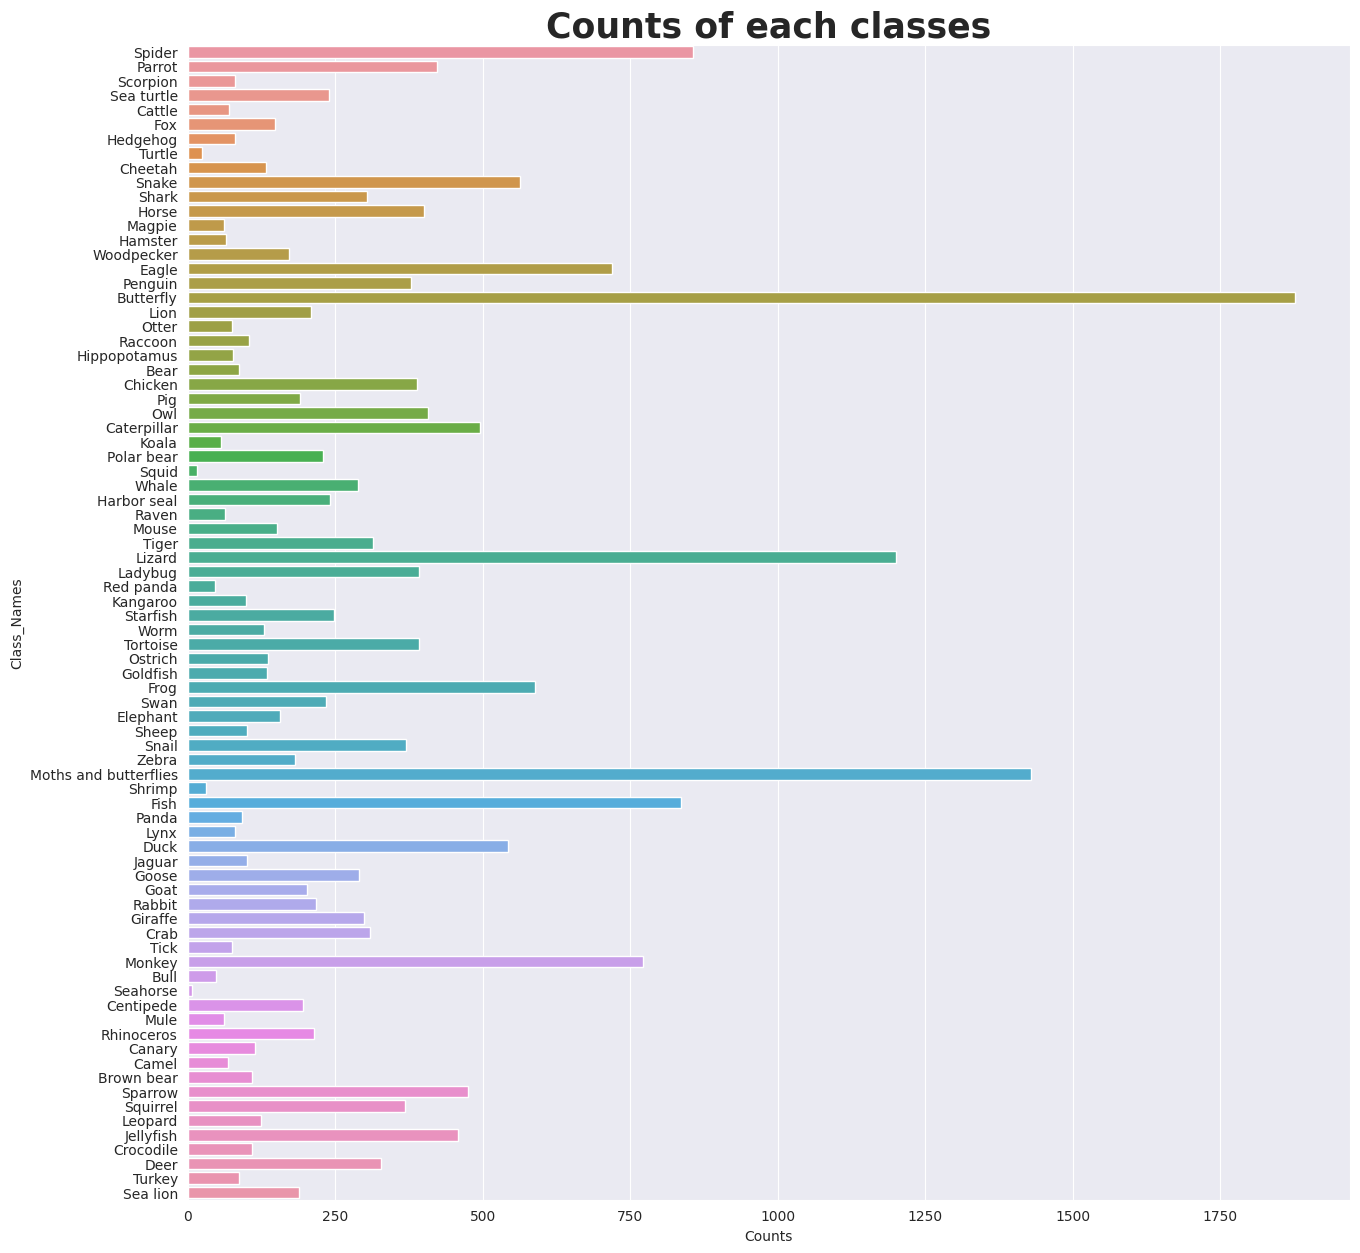

In [8]:
# A variable to store number of images in each class and class names.
counts = []

# Loop over classes
for class_name in classes :
    class_path = os.path.join(train_dir, class_name)
    count = len(os.listdir(class_path))
    counts.append((class_name, count))

# Convert variable to DataFrame
counts = pd.DataFrame(counts, columns=['Class_Names', 'Counts'])

# Plot the DataFrame
plt.figure(figsize=(15, 15))
ax = sns.barplot(data=counts, y='Class_Names', x='Counts')
ax.set_title('Counts of each classes', fontsize=25, fontweight='bold')

plt.show()

<a id="33"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 3.3 </span><span style="color:white"> | Image Show</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 To show a image from each class, do below steps :
    </p>
    <ul>
    <li style='font-size:90%'>1️⃣ Loop over each class and define class pathes by <b>os</b> library.</li></br>
    <li style='font-size:90%'>2️⃣ Choose a aimge in each class and define that image path.</li></br>
    <li style='font-size:90%'>3️⃣ Read image path by <b>Image.open</b> library.</li></br>
    <li style='font-size:90%'>4️⃣ plot them by <b>matplotlib.imshow</b> library.</li></br>
    </ul>
</div>

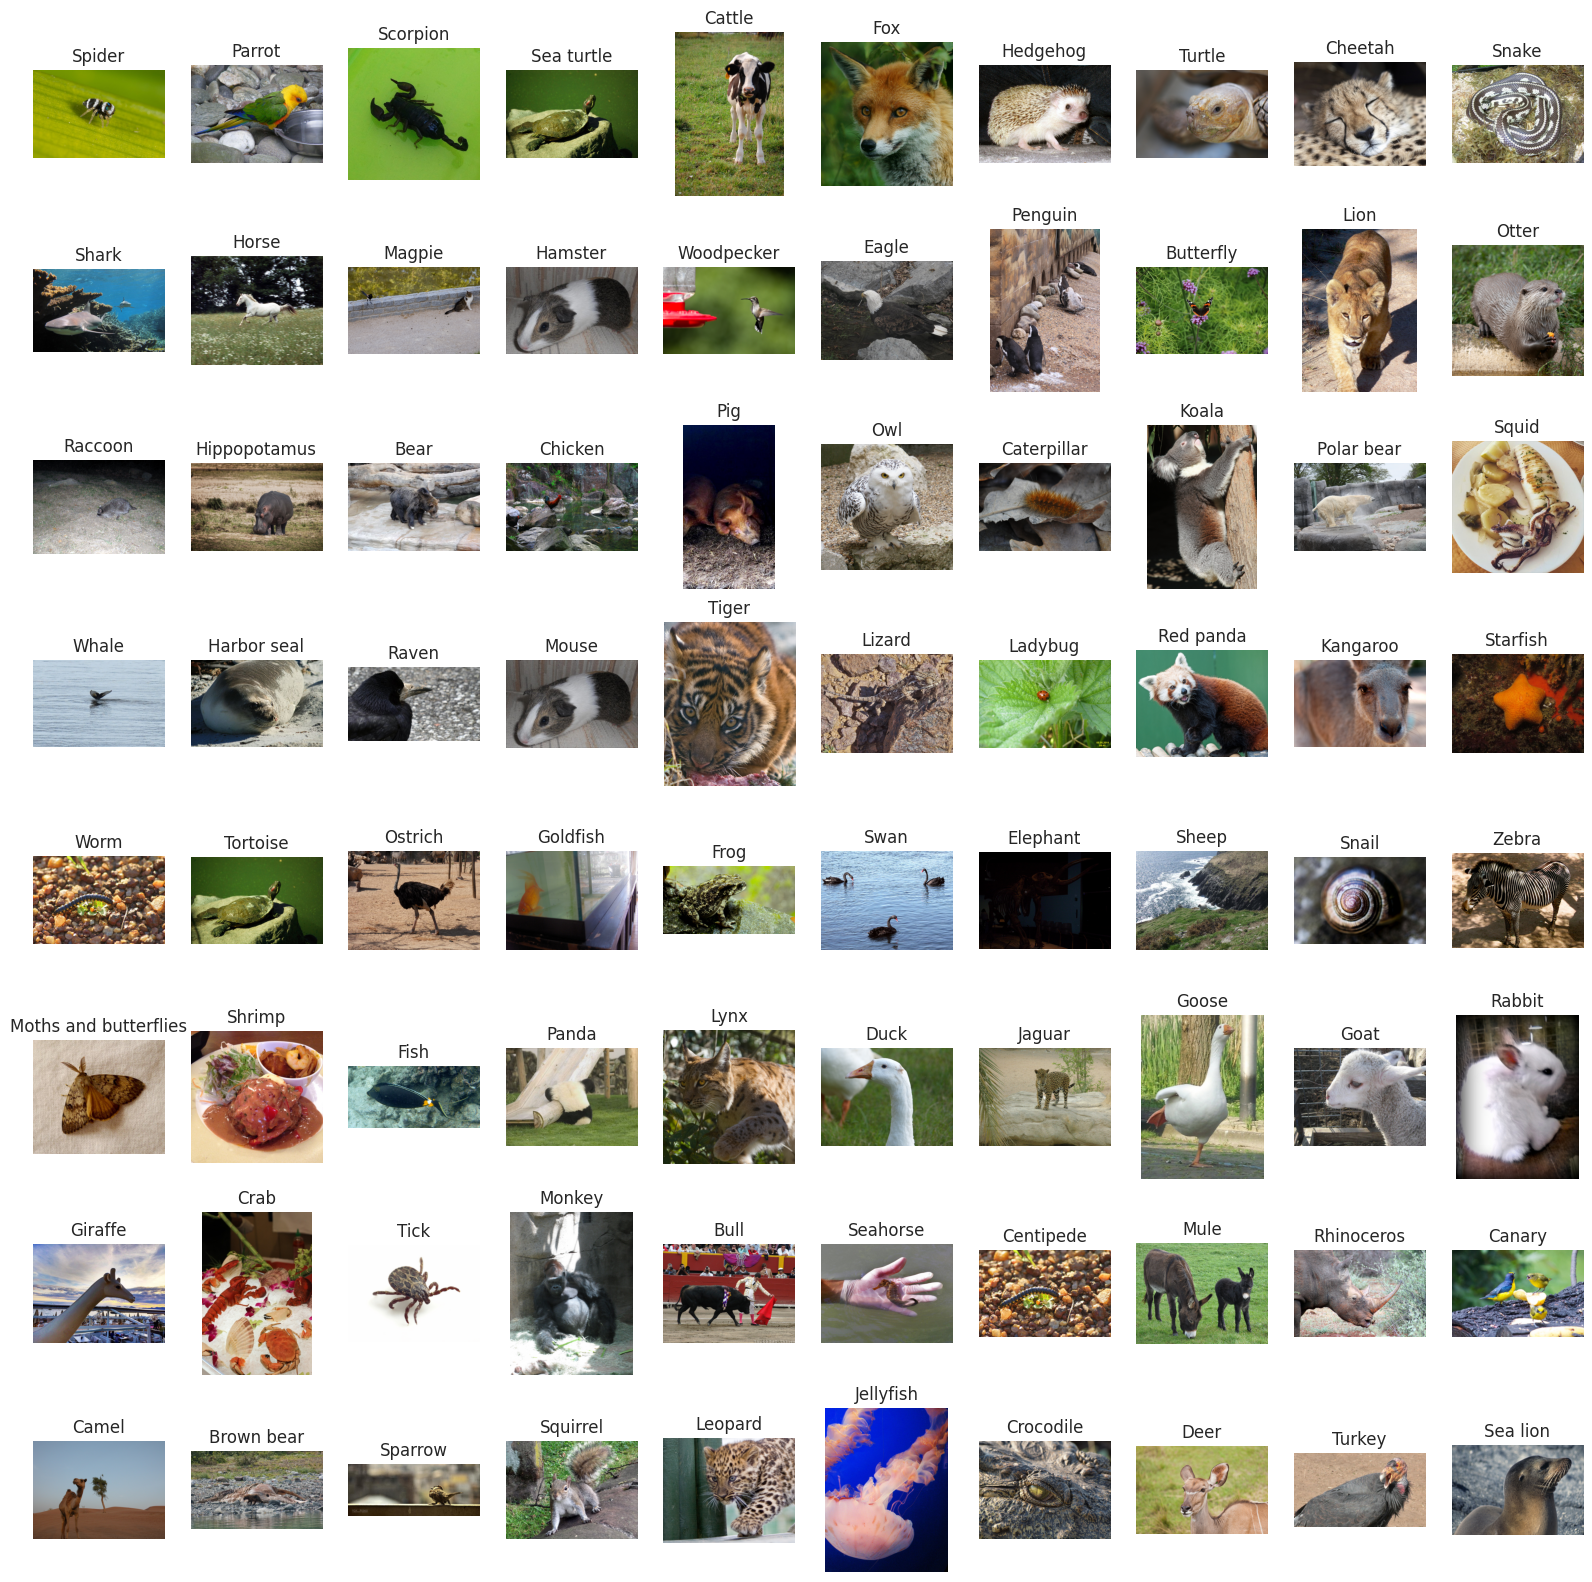

In [9]:
# Define base plot size
fig, ax = plt.subplots(8, 10, figsize=(20, 20))

# Loop over classes
for i in range(len(classes)) :    
    class_name = classes[i]
    class_path = os.path.join(train_dir, class_name)
    img = [file for file in os.listdir(class_path) if file.endswith('.jpg')]
    img = os.path.join(class_path, img[0])
    img = Image.open(img)
    
    # Define index of each image in 8*10 plot
    col = i // 10
    row = i % 10

    ax[col, row].imshow(img)
    ax[col, row].axis('off')
    ax[col, row].set_title(class_name)
plt.show()

<a id="4"></a>
# <p style="padding:10px; margin:0;color:#440381 ;font-size:120% ;text-align:center; border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c; overflow:hidden;font-weight:900; background-color:#0a0254; color:white">Data Preprocessing</p>

<a id="41"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 4.1 </span><span style="color:white"> | Create a DataSet</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 Then <code>image_dataset_from_directory(main_directory, labels='inferred')</code> will return a <code>tf.data.Dataset</code> that yields batches of images from the subdirectories class_a to class_z, together with labels 0 and n .
    </p>
</div>

In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_full = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=classes,
    seed=42,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,    
)

Found 22566 files belonging to 80 classes.


<a id="42"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 4.2 </span><span style="color:white"> | Split to [train, test, validation]</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 To split dataset to <b>train</b>, <b>validation</b> and <b>test</b> , we should <b>Shuffle</b> the dataset.
    </p>
</div>

In [11]:
# Shuffle dataset
train_full = train_full.shuffle(1024).prefetch(tf.data.AUTOTUNE)

| DataSet | Percentage |
|---------|------------|
| Train | 80% |
| Validation | 10% |
| Test | 10% |

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 We should calculate all of the batches in main dataset, then split it to subfolders.
    </p>
</div>

In [12]:
# Print number of all batches in train_full
num_all_batches = len(list(train_full))
print(colored(f'Number of all Batches : {num_all_batches}', 'white', 'on_blue', attrs=['bold']))

Number of all Batches : 706


In [13]:
num_train_batches = int(num_all_batches * 0.8)
num_valid_test_batches = int(num_all_batches - num_train_batches
)
# Print the TARGET : number of batches for train, validation and test dataset to each
print(colored(' Target : ', 'green', attrs=['bold']))
print('-'*35)
print(colored(f'Number of  Train  batches : {num_train_batches}', 'blue', attrs=['bold']))
print(colored(f'Number of Validation batches : {num_valid_test_batches//2}', 'blue', attrs=['bold']))
print(colored(f'Number of Test batches : {num_valid_test_batches//2}', 'blue', attrs=['bold']))

 Target : 
-----------------------------------
Number of  Train  batches : 564
Number of Validation batches : 71
Number of Test batches : 71


<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">➡️ <b>Take : </b>Creates a Dataset with at most count elements from this dataset. </p>
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">➡️ <b>Skip : </b> Creates a Dataset that skips count elements from this dataset. </p>
</div>

In [14]:
train_ds = train_full.take(num_train_batches)

remain = train_full.skip(num_train_batches)

valid_ds = remain.take(num_valid_test_batches//2)
test_ds = remain.skip(num_valid_test_batches//2)


# Print number of batches in train, validation and test dataset after split them
print(colored(f'Number of train batches : {len(list(train_ds))}', 'green', attrs=['bold']))
print(colored(f'Number of valid batches : {len(list(valid_ds))}', 'green', attrs=['bold']))
print(colored(f'Number of test  batches : {len(list(test_ds))}', 'green', attrs=['bold']))

Number of train batches : 564
Number of valid batches : 71
Number of test  batches : 71


<a id="5"></a>
# <p style="padding:10px; margin:0;color:#440381 ;font-size:120% ;text-align:center; border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c; overflow:hidden;font-weight:900; background-color:#0a0254; color:white">Create a Model</p>

<a id="51"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.1 </span><span style="color:white"> | Pretrained model</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 VGG-19 is a convolutional neural network that is 19 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.
    </p>
</div>

|Model|	Size (MB)|Top-1 Accuracy|Top-5 Accuracy|Parameters|Depth|Time (ms)per inference step (CPU)|Time (ms) per inference step (GPU)|
|-----|----------|--------------|--------------|----------|-----|---------------------------------|----------------------------------|
|VGG19|549|71.3%|90.0%|143.7M|19|84.8|4.4|

In [15]:
# Load VGG19 pretrained model with imagenet weights
pretrained_model = keras.applications.VGG19(
    weights='imagenet', classes=80, input_shape=(224, 224, 3), include_top=False
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
# Show information of ResNet50V2 layers
pretrained_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

<a id="52"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.2 </span><span style="color:white"> | Freeze Pretrained Model Layers</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 To freeze some model layers :
    </p>
    <ul>
    <li style='font-size:90%'>1️⃣ set all layers trainablibity to true, means all the layers will train in fit process .</li></br>
    <li style='font-size:90%'>2️⃣ define a flag=False, (set_trainable).</li></br>
    <li style='font-size:90%'>3️⃣ Create a for loop over layers in ResNet50V2 model.</li></br>
    <li style='font-size:90%'>4️⃣ At first, All layer's trainablity is set to Flase (Dont trainble).</li></br>
    <li style='font-size:90%'>5️⃣ When iterator reach target layer, target and layers after that will be trainable.</li></br>
    </ul>
</div>

In [17]:
# Print all the layer's name in ResNet50V2
for layer in pretrained_model.layers :
    print(layer.name)

input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [18]:
# Freeze all layers, except last layer
# The goal is to train just last layer of pre trained model

pretrained_model.trainable = True                # Whole model is trainable
set_trainable = False                            # Set a flag to False

for layer in pretrained_model.layers :           # A loop over model's layers
    if layer.name == 'block5_conv1' :            # Define target layer's name (with if condition)
        set_trainable = True                     # Change flag value to True
    if set_trainable :                           # A condition for True flag
        layer.trainable = True                   # Set layer trainablity to True
    else :                                       # else condition
        layer.trainable = False                  # For layers befor our target layer

<a id="53"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.3 </span><span style="color:white"> | Add Some Dense Layers</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>🔵 I create a some new layers and join this layers on top of the pre-trained model to train them with trainable layers.</p></br>
    <li style='font-size:90%'>➡️ The <b>GlobalAveragePooling2D</b> applies average pooling on the spatial dimensions until each spatial dimension is one, and leaves other dimensions unchanged .</li></br>
    <li style='font-size:90%'>➡️ The <b>Dropout</b> layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.</li></br>
    <li style='font-size:90%'>➡️ The <b>Flattens</b>, Flattens the input. Does not affect the batch size.</li></br>
    <li style='font-size:90%'>➡️ The <b>Dense layer </b>Just your regular densely-connected NN layer.</li></br>
</div>

In [19]:
# Add custom layers on top of the base model
model = keras.models.Sequential()
model.add(pretrained_model)                               # At first add our pre-trained model
model.add(keras.layers.Dropout(0.5))                      # Use a Dropout layer to avoid over-fitting
model.add(keras.layers.GlobalAveragePooling2D())          # Apply GlobalAveragePooling2D
model.add(keras.layers.Flatten())                         # Convert the output to 1D arraay
model.add(keras.layers.Dense(1024, activation='relu'))    # Add a Dense layer with 1024 neuron with activation='relu'
model.add(keras.layers.Dropout(0.5))                      # Use a Dropout layer to avoid over-fitting
model.add(keras.layers.Dense(512, activation='relu'))     # Add a Dense layer with 512 neuron with activation='relu'
model.add(keras.layers.Dropout(0.5))                      # Use a Dropout layer to avoid over-fitting
model.add(keras.layers.Dense(80, activation='softmax'))   # Add a Dense layer with number fo classes neuron as output with activation='softmax'

<a id="54"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.4 </span><span style="color:white"> | CallBacks</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).
    </p>
</div>

In [20]:
# Model CheckPoint Call-Back, to save best model parameters as a .keras file
checkpoint_cb = keras.callbacks.ModelCheckpoint('MyModel.keras', save_best_only=True) 

# Early Stoping Call-Backc to stop trainig process after 'patience' epochs if the metric doesn't grow
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# ReduceLROnPlateau Call-Back to decrease learning-rate base on 'monitor' parameter after 'patience' epochs with a 'factor' is doesn't improve
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

<a id="55"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.5 </span><span style="color:white"> | Compile The Model</span></b>
</p>

In [21]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

<a id="56"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.6 </span><span style="color:white"> | Train The Model</span></b>
</p>

<div style="background-color:#deeefc; border-radius:10px 10px; padding:5px; font-weight:500">
    <p>
        🔵 Now, its time to train our model to learn 80 classes of animals, we use 100 epochs with defined callbacks.
</div>

In [22]:
# Train model by .fit function
history = model.fit(
    train_ds,                                          # Dataset to train model
    epochs=100,                                        # Number of epochs to train
    validation_data=valid_ds,                          # Validation dataset
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr] # List of call backs
)

Epoch 1/100


I0000 00:00:1717854338.092963     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717854338.119153     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


564/564 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.0690 - loss: 4.3171

W0000 00:00:1717854525.046714     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


564/564 ━━━━━━━━━━━━━━━━━━━━ 306s 352ms/step - accuracy: 0.0691 - loss: 4.3165 - val_accuracy: 0.2051 - val_loss: 3.3657 - learning_rate: 1.0000e-04
Epoch 2/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 235s 308ms/step - accuracy: 0.1899 - loss: 3.4489 - val_accuracy: 0.3138 - val_loss: 2.8436 - learning_rate: 1.0000e-04
Epoch 3/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 232s 308ms/step - accuracy: 0.3222 - loss: 2.7831 - val_accuracy: 0.4771 - val_loss: 2.0763 - learning_rate: 1.0000e-04
Epoch 4/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 236s 309ms/step - accuracy: 0.4649 - loss: 2.1451 - val_accuracy: 0.6166 - val_loss: 1.4782 - learning_rate: 1.0000e-04
Epoch 5/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 239s 317ms/step - accuracy: 0.5609 - loss: 1.7324 - val_accuracy: 0.6536 - val_loss: 1.2165 - learning_rate: 1.0000e-04
Epoch 6/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 247s 313ms/step - accuracy: 0.6357 - loss: 1.3888 - val_accuracy: 0.7315 - val_loss: 0.9461 - learning_rate: 1.0000e-04
Epoch 7/100
564/564 ━━━━━━━━━━━━━━━━━━━━ 235s 

In [23]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history.history)
# Show 5 tails of dataframe
result_df.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
61,0.956276,0.072040,0.958627,0.063413,3.125000e-06
62,0.959494,0.068933,0.957747,0.066219,1.562500e-06
63,0.958606,0.067783,0.959947,0.062656,1.562500e-06
64,0.957330,0.070528,0.949384,0.067896,1.562500e-06
65,0.960382,0.068011,0.956426,0.069385,1.000000e-06


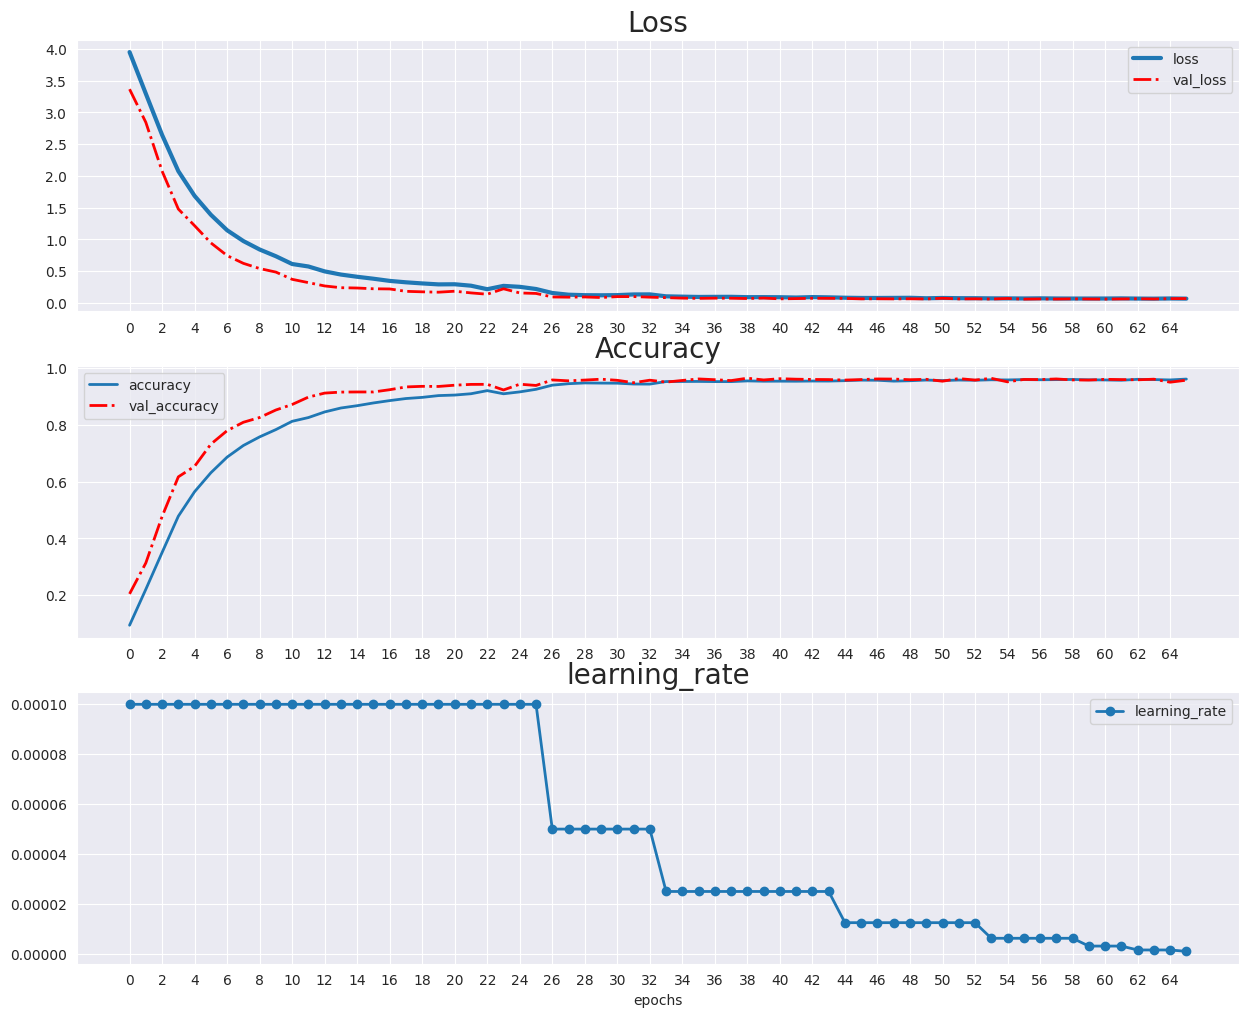

In [24]:
# Define a X variable to store range of epochs
x = np.arange(len(result_df))

# Create a plot with 3 row and 1 col with size of (15, 12)
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

# AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)                          
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].set_xticks(np.arange(0, len(x), 2))
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].set_xticks(np.arange(0, len(x), 2))
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.learning_rate, label='learning_rate', linewidth=2, marker='o')
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].set_xticks(np.arange(0, len(x), 2))
ax[2].legend()

plt.show()

<a id="57"></a>
# <p style="background-color:#0a0254; font-size:75%; text-align:left;border-radius:10px 10px; padding:5px; border:solid 2px #09375b; box-shadow: 8px 8px 8px #042b4c">   <b><span style="color:red"> Step 5.7 </span><span style="color:white"> | Evaluation </span></b>
</p>

In [25]:
# checkpoint callback, save base model weights in "MyModel.keras".
# So, we should load it by keras.models.load_model
best_model = keras.models.load_model('MyModel.keras')

In [26]:
# Evaluate model by model.evaluate()
loss, accuracy = best_model.evaluate(test_ds)
print()
print(colored(f'Loss : {loss}', 'green', attrs=['bold']))
print(colored(f'Accuracy : {accuracy*100}%', 'green', attrs=['bold']))

 1/71 ━━━━━━━━━━━━━━━━━━━━ 1:10:48 61s/step - accuracy: 0.9062 - loss: 0.1186

W0000 00:00:1717870055.246617     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 155ms/step - accuracy: 0.9645 - loss: 0.0625

Loss : 0.06164209544658661
Accuracy : 96.25880122184753%


<a id="author"></a>
<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/sXwGWcwC/download.jpg); background-size: cover">

<h4 align="left"><span style="font-weight:700; font-size:150%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://t.me/Nima_Pourmoradi'>Telegram : https://t.me/Nima_Pourmoradi</a></font></h6>

<div style="background-color:#c5d8d1; padding: 25px 0px 10px 0px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:center">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"><b>✅ If you like my notebook, please upvote it ✅
    </b></p>
</div>

<img src="https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg">

##### [🏠 Tabel of Contents](#tbl_content)